# Basics about Pandas library Python

In [1]:
#imports libraries needed
import pandas as pd
import numpy as np

# Creating Data Frame

In [2]:
#== Creating data ==
data = {'animal' : ['cat','cat', 'snake', 'dog', 'dog', 'cat', 'snake', 'cat', 'dog', 'dog'],
        'age': [2.5, 3, 0.5, np.nan, 5, 2, 4.5, np.nan, 7, 3],
        'visits' : [1,3,2,3,2,3,1,1,2,1],
        'priority' : ['yes', 'yes', 'no', 'yes', 'no', 'no', 'no', 'yes', 'no', 'no']}

labels = ['a','b','c','d', 'e', 'f', 'g', 'h', 'i', 'j']
print(data)

{'animal': ['cat', 'cat', 'snake', 'dog', 'dog', 'cat', 'snake', 'cat', 'dog', 'dog'], 'age': [2.5, 3, 0.5, nan, 5, 2, 4.5, nan, 7, 3], 'visits': [1, 3, 2, 3, 2, 3, 1, 1, 2, 1], 'priority': ['yes', 'yes', 'no', 'yes', 'no', 'no', 'no', 'yes', 'no', 'no']}


In [3]:
#== Shape ===
df = pd.DataFrame(data=data, index=labels,columns=['animal','age','visits', 'priority'])
type(df)
print(df.shape)

(10, 4)


In [4]:
df['animal'].value_counts() 
type(df['animal'].value_counts())

pandas.core.series.Series

In [5]:
df['age'].mean()

3.4375

In [6]:
df.sort_values(by=['visits'], ascending=False, inplace=True)
df

,animal,age,visits,priority
b,cat,3.0,3,yes
d,dog,NaN,3,yes
f,cat,2.0,3,no
c,snake,0.5,2,no
e,dog,5.0,2,no
i,dog,7.0,2,no
a,cat,2.5,1,yes
g,snake,4.5,1,no
h,cat,NaN,1,yes
j,dog,3.0,1,no


# Reading Data from external file

In [7]:
# read data from csv
df = pd.read_csv("https://pycourse.s3.amazonaws.com/temperature.csv")

In [8]:
df.head()

,date,temperatura,classification
0,2020-01-01,29.1,quente
1,2020-02-01,31.2,muito quente
2,2020-03-01,28.5,quente
3,2020-04-01,28.0,quente
4,2020-05-01,24.0,confortavel


In [9]:
#dependency for Excel file
!pip install openpyxl

In [10]:
# read excel file
excel_file = pd.ExcelFile("http://pycourse.s3.amazonaws.com/temperature.xlsx")

In [11]:
# read Sheet1
df_Sheet1 = pd.read_excel(excel_file, sheet_name='Sheet1')
df_Sheet1

,date,temperatura,classification
0,2020-01-01,29.1,quente
1,2020-02-01,31.2,muito quente
2,2020-03-01,28.5,quente
3,2020-04-01,28.0,quente
4,2020-05-01,24.0,confortavel
5,2020-06-01,20.0,frio


In [12]:
# read Sheet2
df_Sheet2 = pd.read_excel(excel_file, sheet_name='Sheet2', decimal=',')
df_Sheet2

,date,temperatura,classification
0,2020-01-01,29.1,quente
1,2020-02-01,31.2,muito quente
2,2020-03-01,28.5,quente
3,2020-04-01,28.0,quente
4,2020-05-01,24.0,confortavel
5,2020-06-01,20.0,frio


In [13]:
n = 8
df.head(n)

,date,temperatura,classification
0,2020-01-01,29.1,quente
1,2020-02-01,31.2,muito quente
2,2020-03-01,28.5,quente
3,2020-04-01,28.0,quente
4,2020-05-01,24.0,confortavel
5,2020-06-01,20.0,frio


In [14]:
#types of each item of the DF, attention to date - it's considerates as object
df.dtypes

date               object
temperatura       float64
classification     object
dtype: object

In [15]:
#Show some statistics of the data: temperatura - temperature
df.describe()

,temperatura
count,6.000000
mean,26.800000
std,4.075782
min,20.000000
25%,25.000000
50%,28.250000
75%,28.950000
max,31.200000


In [16]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6 entries, 0 to 5
Data columns (total 3 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   date            6 non-null      object 
 1   temperatura     6 non-null      float64
 2   classification  6 non-null      object 
dtypes: float64(1), object(2)
memory usage: 272.0+ bytes


In [17]:
df.columns

Index(['date', 'temperatura', 'classification'], dtype='object')

In [18]:
#Rename the columns 
df.columns = ['Date', 'Temperature', 'Classification']
df.columns

Index(['Date', 'Temperature', 'Classification'], dtype='object')

# Indexing

In [19]:
df.head()

,Date,Temperature,Classification
0,2020-01-01,29.1,quente
1,2020-02-01,31.2,muito quente
2,2020-03-01,28.5,quente
3,2020-04-01,28.0,quente
4,2020-05-01,24.0,confortavel


In [20]:
#Select one column
df['Date']

0    2020-01-01
1    2020-02-01
2    2020-03-01
3    2020-04-01
4    2020-05-01
5    2020-06-01
Name: Date, dtype: object

In [21]:
#type 
type(df['Date'])

pandas.core.series.Series

In [22]:
#Select multi-column and with different order of the file
df[['Date', 'Classification', 'Temperature']]

,Date,Classification,Temperature
0,2020-01-01,quente,29.1
1,2020-02-01,muito quente,31.2
2,2020-03-01,quente,28.5
3,2020-04-01,quente,28.0
4,2020-05-01,confortavel,24.0
5,2020-06-01,frio,20.0


In [23]:
#iloc
help(df.iloc)

Help on _iLocIndexer in module pandas.core.indexing object:

class _iLocIndexer(_LocationIndexer)
 |  Purely integer-location based indexing for selection by position.
 |  
 |  ``.iloc[]`` is primarily integer position based (from ``0`` to
 |  ``length-1`` of the axis), but may also be used with a boolean
 |  array.
 |  
 |  Allowed inputs are:
 |  
 |  - An integer, e.g. ``5``.
 |  - A list or array of integers, e.g. ``[4, 3, 0]``.
 |  - A slice object with ints, e.g. ``1:7``.
 |  - A boolean array.
 |  - A ``callable`` function with one argument (the calling Series or
 |    DataFrame) and that returns valid output for indexing (one of the above).
 |    This is useful in method chains, when you don't have a reference to the
 |    calling object, but would like to base your selection on some value.
 |  
 |  ``.iloc`` will raise ``IndexError`` if a requested indexer is
 |  out-of-bounds, except *slice* indexers which allow out-of-bounds
 |  indexing (this conforms with python/numpy *sli

In [24]:
#indexing by position 
#selecting all lines from column 1
df.iloc[:,1]

0    29.1
1    31.2
2    28.5
3    28.0
4    24.0
5    20.0
Name: Temperature, dtype: float64

In [25]:
#indexing by column name
#selecting all lines from column 1
df.loc[:,'Temperature']

0    29.1
1    31.2
2    28.5
3    28.0
4    24.0
5    20.0
Name: Temperature, dtype: float64

In [26]:
#multi columns
df.iloc[:,1:3]

,Temperature,Classification
0,29.1,quente
1,31.2,muito quente
2,28.5,quente
3,28.0,quente
4,24.0,confortavel
5,20.0,frio


In [27]:
#multi columns
df.loc[:,['Temperature', 'Classification']]

,Temperature,Classification
0,29.1,quente
1,31.2,muito quente
2,28.5,quente
3,28.0,quente
4,24.0,confortavel
5,20.0,frio


# Boolean Index

In [28]:
#Changing type for column: Date
df['Date'] = pd.to_datetime(df['Date'])
df.dtypes

Date              datetime64[ns]
Temperature              float64
Classification            object
dtype: object

In [29]:
df

,Date,Temperature,Classification
0,2020-01-01,29.1,quente
1,2020-02-01,31.2,muito quente
2,2020-03-01,28.5,quente
3,2020-04-01,28.0,quente
4,2020-05-01,24.0,confortavel
5,2020-06-01,20.0,frio


In [30]:
#set index
df = df.set_index('Date')
df

,Temperature,Classification
Date,,
2020-01-01,29.1,quente
2020-02-01,31.2,muito quente
2020-03-01,28.5,quente
2020-04-01,28.0,quente
2020-05-01,24.0,confortavel
2020-06-01,20.0,frio


In [31]:
#filter Temperature above 25 degrees
df[df['Temperature'] >= 25]

,Temperature,Classification
Date,,
2020-01-01,29.1,quente
2020-02-01,31.2,muito quente
2020-03-01,28.5,quente
2020-04-01,28.0,quente


In [32]:
#Same thing developed in: 1-BasicsNumpy.ipynb
cond = df['Temperature'] >= 25
cond


Date
2020-01-01     True
2020-02-01     True
2020-03-01     True
2020-04-01     True
2020-05-01    False
2020-06-01    False
Name: Temperature, dtype: bool

In [33]:
df[cond]

,Temperature,Classification
Date,,
2020-01-01,29.1,quente
2020-02-01,31.2,muito quente
2020-03-01,28.5,quente
2020-04-01,28.0,quente


In [34]:
#filter Dates below to: March 2020
# This is one of the reasons to change the type of the date data, then you can user boolean index
df[df.index <= '2020-03-01']

,Temperature,Classification
Date,,
2020-01-01,29.1,quente
2020-02-01,31.2,muito quente
2020-03-01,28.5,quente


In [35]:
#filer Dates below to: March 2020 and slice of the column: Classification
df.loc[df.index<= '2020-03-01', ['Classification']]

,Classification
Date,
2020-01-01,quente
2020-02-01,muito quente
2020-03-01,quente


In [36]:
#filer Dates below to: March 2020 and slice of the column: Classification
# with iloc
df.iloc[df.index<= '2020-03-01', [-1]]

,Classification
Date,
2020-01-01,quente
2020-02-01,muito quente
2020-03-01,quente


# Ordering

In [37]:
#Sort values
df.sort_values?

Signature:
df.sort_values(
    by,
    axis: 'Axis' = 0,
    ascending=True,
    inplace: 'bool' = False,
    kind: 'str' = 'quicksort',
    na_position: 'str' = 'last',
    ignore_index: 'bool' = False,
    key: 'ValueKeyFunc' = None,
)
Docstring:
Sort by the values along either axis.

Parameters
----------
        by : str or list of str
            Name or list of names to sort by.

            - if `axis` is 0 or `'index'` then `by` may contain index
              levels and/or column labels.
            - if `axis` is 1 or `'columns'` then `by` may contain column
              levels and/or index labels.
axis : {0 or 'index', 1 or 'columns'}, default 0
     Axis to be sorted.
ascending : bool or list of bool, default True
     Sort ascending vs. descending. Specify list for multiple sort
     orders.  If this is a list of bools, must match the length of
     the by.
inplace : bool, default False
     If True, perform operation in-place.
kind : {'quicksort', 'mergesort', 'heapsort'

In [38]:
df

,Temperature,Classification
Date,,
2020-01-01,29.1,quente
2020-02-01,31.2,muito quente
2020-03-01,28.5,quente
2020-04-01,28.0,quente
2020-05-01,24.0,confortavel
2020-06-01,20.0,frio


In [39]:
#ordering by Temperature
df.sort_values(by='Temperature')

,Temperature,Classification
Date,,
2020-06-01,20.0,frio
2020-05-01,24.0,confortavel
2020-04-01,28.0,quente
2020-03-01,28.5,quente
2020-01-01,29.1,quente
2020-02-01,31.2,muito quente


In [40]:
#ordering by Classification descending
df.sort_values(by='Classification', ascending=False)

,Temperature,Classification
Date,,
2020-01-01,29.1,quente
2020-03-01,28.5,quente
2020-04-01,28.0,quente
2020-02-01,31.2,muito quente
2020-06-01,20.0,frio
2020-05-01,24.0,confortavel


In [41]:
#ordering with multi column
df.sort_values(by=['Classification', 'Temperature'])

,Temperature,Classification
Date,,
2020-05-01,24.0,confortavel
2020-06-01,20.0,frio
2020-02-01,31.2,muito quente
2020-04-01,28.0,quente
2020-03-01,28.5,quente
2020-01-01,29.1,quente


In [42]:
#Ordering by index
df.sort_index()

,Temperature,Classification
Date,,
2020-01-01,29.1,quente
2020-02-01,31.2,muito quente
2020-03-01,28.5,quente
2020-04-01,28.0,quente
2020-05-01,24.0,confortavel
2020-06-01,20.0,frio


In [43]:
#Ordering by index descending
df.sort_index(ascending=False)

,Temperature,Classification
Date,,
2020-06-01,20.0,frio
2020-05-01,24.0,confortavel
2020-04-01,28.0,quente
2020-03-01,28.5,quente
2020-02-01,31.2,muito quente
2020-01-01,29.1,quente


In [44]:
df['Classification'].value_counts(ascending=False)

quente          3
muito quente    1
confortavel     1
frio            1
Name: Classification, dtype: int64

# Visualization

<AxesSubplot:xlabel='Date'>

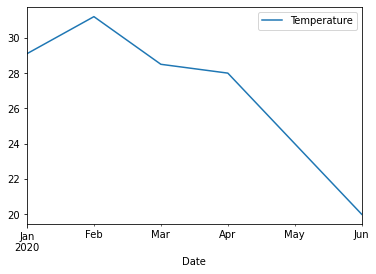

In [45]:
#line plot
#when changed Date to datetime and index, helped to work with plot here as x-axis.
df.plot() 

<AxesSubplot:xlabel='Date'>

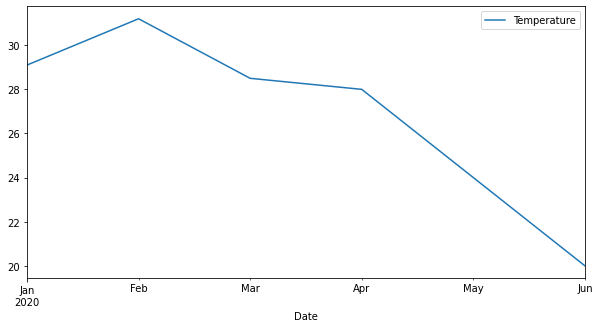

In [46]:
# line plot size of the plot
df.plot(figsize=(10,5))

<AxesSubplot:xlabel='Date'>

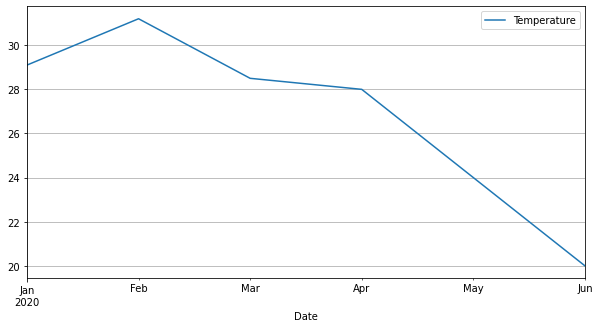

In [47]:
#plot with grid
df.plot(figsize=(10,5), grid=True)

<AxesSubplot:xlabel='Date'>

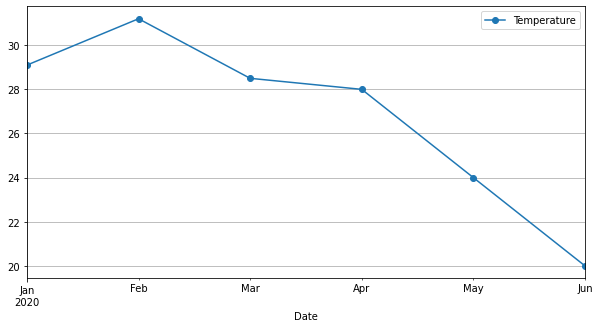

In [48]:
#line plot with style to show where is the data
df.plot(style='-o',figsize=(10,5), grid=True)

<AxesSubplot:xlabel='Date'>

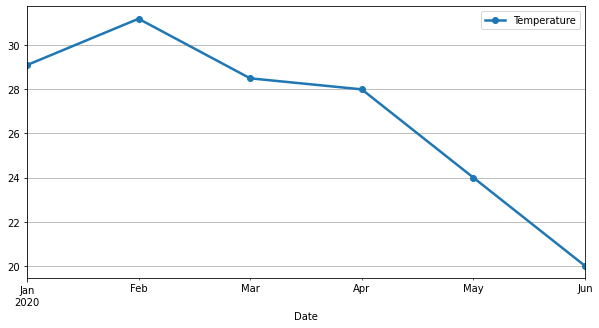

In [49]:
#line plot increasing the line size
df.plot(style='-o',linewidth=2.5, figsize=(10,5), grid=True)

<AxesSubplot:xlabel='Date'>

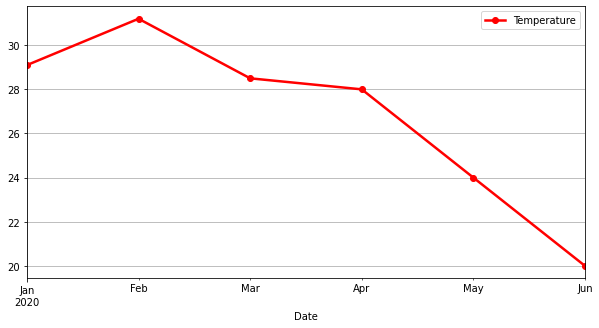

In [50]:
#line plot line's color
df.plot(style='-o',linewidth=2.5, color='red', figsize=(10,5), grid=True)

<AxesSubplot:xlabel='Date'>

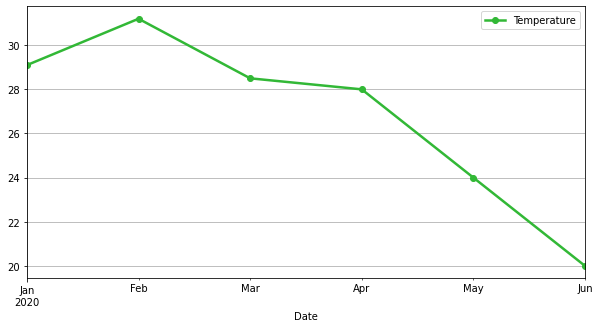

In [51]:
#line plot line's color with hex
#Colour picker
df.plot(style='-o',linewidth=2.5, color='#32b836', figsize=(10,5), grid=True)

In [52]:
df

,Temperature,Classification
Date,,
2020-01-01,29.1,quente
2020-02-01,31.2,muito quente
2020-03-01,28.5,quente
2020-04-01,28.0,quente
2020-05-01,24.0,confortavel
2020-06-01,20.0,frio


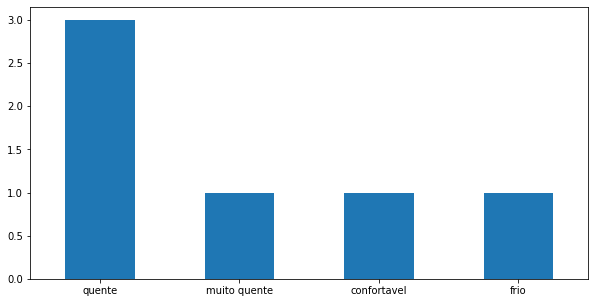

In [53]:
#plot with bar
df['Classification'].value_counts().plot.bar(figsize=(10,5),
                                             rot=0);

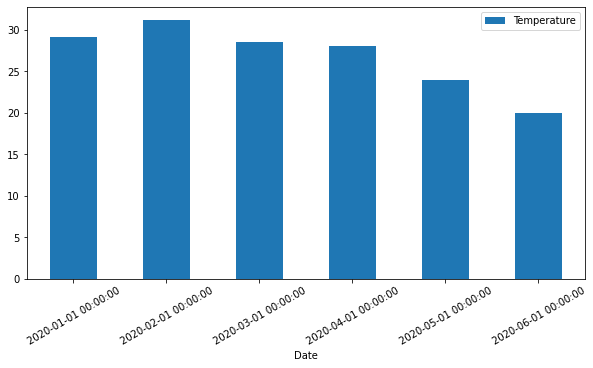

In [54]:
#plot with bar with label rotation
df.plot(kind='bar', figsize=(10,5), rot=30);

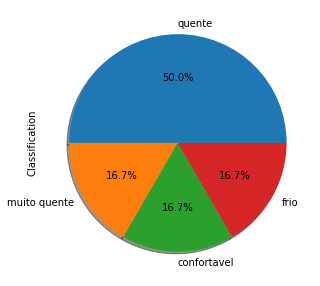

In [55]:
#pie ploy autopct is to show the percentage
df['Classification'].value_counts().plot.pie(figsize=(10,5),
                                             shadow=True,
                                            autopct='%1.1f%%');

# Other operations with Pandas

In [56]:
#groupby - agregation using one or more columns
df.groupby(by='Classification')

In [57]:
#groupby - Classification and calculating mean()
df.groupby(by='Classification').mean()

,Temperature
Classification,
confortavel,24.000000
frio,20.000000
muito quente,31.200000
quente,28.533333


In [58]:
#groupby - Classification and calculating sum()
df.groupby(by='Classification').sum()

,Temperature
Classification,
confortavel,24.0
frio,20.0
muito quente,31.2
quente,85.6


In [59]:
#drop: remove one column
df.drop('Temperature', axis=1)

,Classification
Date,
2020-01-01,quente
2020-02-01,muito quente
2020-03-01,quente
2020-04-01,quente
2020-05-01,confortavel
2020-06-01,frio


In [60]:
#watch for inplace methods
df

,Temperature,Classification
Date,,
2020-01-01,29.1,quente
2020-02-01,31.2,muito quente
2020-03-01,28.5,quente
2020-04-01,28.0,quente
2020-05-01,24.0,confortavel
2020-06-01,20.0,frio


In [61]:
#Copy DataFrame and avoid shared memory
df2 = df.copy()
df2.drop('Temperature', axis=1)

,Classification
Date,
2020-01-01,quente
2020-02-01,muito quente
2020-03-01,quente
2020-04-01,quente
2020-05-01,confortavel
2020-06-01,frio


In [62]:
df2.drop('Temperature', axis=1, inplace=True)
df2

,Classification
Date,
2020-01-01,quente
2020-02-01,muito quente
2020-03-01,quente
2020-04-01,quente
2020-05-01,confortavel
2020-06-01,frio
